Topic 3: Recommender System

03. Content-Based Filtering

Content-Based recommendation system dua vao cac thuoc tinh giong nhau cua san pham de dua ra goi y cho nguoi dung.
Trong topic nay, thuoc tinh cua san pham duoc chon la ten(name) va mo ta san pham(description)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from underthesea import word_tokenize, pos_tag, sent_tokenize
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
# Doc du lieu
products = pd.read_csv('Product_clean.csv')
reviews = pd.read_csv('Review_clean.csv')

In [4]:
print('Trước khi dropping, records =', products.shape[0])
products.drop_duplicates(inplace=True)
print('Sau khi dropping, records =', products.shape[0])

Trước khi dropping, records = 4373
Sau khi dropping, records = 4373


In [5]:
products.head(5)

,item_id,name,description,rating,price,list_price,brand,group,url,image,product_infomation
0,48102821,Tai nghe Bluetooth Inpods 12 - Cảm biến vân ta...,THÔNG TIN CHI TIẾT\nDung lượng pin 300\nThời g...,4.0,77000,300000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-inpods-12-cam-bien-...,https://salt.tikicdn.com/cache/280x280/ts/prod...,inpods cảm_biến vân chống nước_màu_sắc đa_dạng...
1,52333193,Tai nghe bluetooth không dây F9 True wireless ...,THÔNG TIN CHI TIẾT\nDung lượng pin 2000mah\nTh...,4.5,132000,750000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-khong-day-f9-true-w...,https://salt.tikicdn.com/cache/280x280/ts/prod...,không dây true wireless dock sạc báo képthông ...
2,299461,Chuột Không Dây Logitech M331 Silent - Hàng Ch...,THÔNG TIN CHI TIẾT\nThương hiệu Logitech\nĐộ p...,4.8,299000,399000,Logitech,Thiết Bị Số - Phụ Kiện Số/Phụ kiện máy tính và...,https://chuot-khong-day-logitech-m331-silent-p...,https://salt.tikicdn.com/cache/280x280/media/c...,chuột không dây logitech silent hàng hãngthông...
3,57440329,Loa Bluetooth 5.0 Kiêm Đồng Hồ Báo Thức - [[ 2...,THÔNG TIN CHI TIẾT\nThương hiệu Acome\nXuất xứ...,4.7,149000,350000,Acome,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://loa-bluetooth-5-0-kiem-dong-ho-bao-thu...,https://salt.tikicdn.com/cache/280x280/ts/prod...,kiêm đồng_hồ báo_thức robot hàng hãngthông tiế...
4,38458616,Tai Nghe Bluetooth Apple AirPods Pro True Wire...,THÔNG TIN CHI TIẾT\nThương hiệu Apple\nXuất xứ...,4.8,5090000,8500000,Apple,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-apple-airpods-pro-t...,https://salt.tikicdn.com/cache/280x280/ts/prod...,airpods true wireless hàng hãng athông tiết th...


In [6]:
products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4373 entries, 0 to 4372
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   item_id             4373 non-null   int64  
 1   name                4373 non-null   object 
 2   description         4370 non-null   object 
 3   rating              4373 non-null   float64
 4   price               4373 non-null   int64  
 5   list_price          4373 non-null   int64  
 6   brand               4373 non-null   object 
 7   group               4373 non-null   object 
 8   url                 4373 non-null   object 
 9   image               4373 non-null   object 
 10  product_infomation  4373 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 410.0+ KB


In [7]:
products.shape

(4373, 11)

In [8]:
products = products[products['name'].notnull()]

In [9]:
products['name_description'] = products.name + products.description + products.group

In [10]:
products = products[products['name_description'].notnull()]

In [11]:
#products['name_description_pre'] = products['name_description'].apply(lambda x: word_tokenize(x, format='text'))
product_information_token = [[text for text in x.split()] for x in products.product_infomation]

In [12]:
products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4370 entries, 0 to 4372
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   item_id             4370 non-null   int64  
 1   name                4370 non-null   object 
 2   description         4370 non-null   object 
 3   rating              4370 non-null   float64
 4   price               4370 non-null   int64  
 5   list_price          4370 non-null   int64  
 6   brand               4370 non-null   object 
 7   group               4370 non-null   object 
 8   url                 4370 non-null   object 
 9   image               4370 non-null   object 
 10  product_infomation  4370 non-null   object 
 11  name_description    4370 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 443.8+ KB


In [13]:
type(products)

pandas.core.frame.DataFrame

In [14]:
products.shape

(4370, 12)

In [15]:
products.head(5)

,item_id,name,description,rating,price,list_price,brand,group,url,image,product_infomation,name_description
0,48102821,Tai nghe Bluetooth Inpods 12 - Cảm biến vân ta...,THÔNG TIN CHI TIẾT\nDung lượng pin 300\nThời g...,4.0,77000,300000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-inpods-12-cam-bien-...,https://salt.tikicdn.com/cache/280x280/ts/prod...,inpods cảm_biến vân chống nước_màu_sắc đa_dạng...,Tai nghe Bluetooth Inpods 12 - Cảm biến vân ta...
1,52333193,Tai nghe bluetooth không dây F9 True wireless ...,THÔNG TIN CHI TIẾT\nDung lượng pin 2000mah\nTh...,4.5,132000,750000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-khong-day-f9-true-w...,https://salt.tikicdn.com/cache/280x280/ts/prod...,không dây true wireless dock sạc báo képthông ...,Tai nghe bluetooth không dây F9 True wireless ...
2,299461,Chuột Không Dây Logitech M331 Silent - Hàng Ch...,THÔNG TIN CHI TIẾT\nThương hiệu Logitech\nĐộ p...,4.8,299000,399000,Logitech,Thiết Bị Số - Phụ Kiện Số/Phụ kiện máy tính và...,https://chuot-khong-day-logitech-m331-silent-p...,https://salt.tikicdn.com/cache/280x280/media/c...,chuột không dây logitech silent hàng hãngthông...,Chuột Không Dây Logitech M331 Silent - Hàng Ch...
3,57440329,Loa Bluetooth 5.0 Kiêm Đồng Hồ Báo Thức - [[ 2...,THÔNG TIN CHI TIẾT\nThương hiệu Acome\nXuất xứ...,4.7,149000,350000,Acome,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://loa-bluetooth-5-0-kiem-dong-ho-bao-thu...,https://salt.tikicdn.com/cache/280x280/ts/prod...,kiêm đồng_hồ báo_thức robot hàng hãngthông tiế...,Loa Bluetooth 5.0 Kiêm Đồng Hồ Báo Thức - [[ 2...
4,38458616,Tai Nghe Bluetooth Apple AirPods Pro True Wire...,THÔNG TIN CHI TIẾT\nThương hiệu Apple\nXuất xứ...,4.8,5090000,8500000,Apple,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-apple-airpods-pro-t...,https://salt.tikicdn.com/cache/280x280/ts/prod...,airpods true wireless hàng hãng athông tiết th...,Tai Nghe Bluetooth Apple AirPods Pro True Wire...


In [16]:
products = products.reset_index()

In [17]:
# stop words

In [18]:
STOP_WORD_FILE = 'vietnamese-stopwords.txt'

In [19]:
with open(STOP_WORD_FILE, 'r', encoding='utf-8') as file:
    stop_words = file.read()

stop_words = stop_words.split('\n')    

In [20]:
# TF-IDF

In [21]:
#tf = TfidfVectorizer(analyzer='word', min_df=0, ngram_range=(1,3), stop_words=stop_words)
tf = TfidfVectorizer(analyzer='word', min_df=0, stop_words=stop_words)

In [23]:
#tfidf_matrix = tf.fit_transform(products.name_description_pre)
tfidf_matrix = tf.fit_transform(products.product_infomation)

In [24]:
products.head()

,index,item_id,name,description,rating,price,list_price,brand,group,url,image,product_infomation,name_description
0,0,48102821,Tai nghe Bluetooth Inpods 12 - Cảm biến vân ta...,THÔNG TIN CHI TIẾT\nDung lượng pin 300\nThời g...,4.0,77000,300000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-inpods-12-cam-bien-...,https://salt.tikicdn.com/cache/280x280/ts/prod...,inpods cảm_biến vân chống nước_màu_sắc đa_dạng...,Tai nghe Bluetooth Inpods 12 - Cảm biến vân ta...
1,1,52333193,Tai nghe bluetooth không dây F9 True wireless ...,THÔNG TIN CHI TIẾT\nDung lượng pin 2000mah\nTh...,4.5,132000,750000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-khong-day-f9-true-w...,https://salt.tikicdn.com/cache/280x280/ts/prod...,không dây true wireless dock sạc báo képthông ...,Tai nghe bluetooth không dây F9 True wireless ...
2,2,299461,Chuột Không Dây Logitech M331 Silent - Hàng Ch...,THÔNG TIN CHI TIẾT\nThương hiệu Logitech\nĐộ p...,4.8,299000,399000,Logitech,Thiết Bị Số - Phụ Kiện Số/Phụ kiện máy tính và...,https://chuot-khong-day-logitech-m331-silent-p...,https://salt.tikicdn.com/cache/280x280/media/c...,chuột không dây logitech silent hàng hãngthông...,Chuột Không Dây Logitech M331 Silent - Hàng Ch...
3,3,57440329,Loa Bluetooth 5.0 Kiêm Đồng Hồ Báo Thức - [[ 2...,THÔNG TIN CHI TIẾT\nThương hiệu Acome\nXuất xứ...,4.7,149000,350000,Acome,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://loa-bluetooth-5-0-kiem-dong-ho-bao-thu...,https://salt.tikicdn.com/cache/280x280/ts/prod...,kiêm đồng_hồ báo_thức robot hàng hãngthông tiế...,Loa Bluetooth 5.0 Kiêm Đồng Hồ Báo Thức - [[ 2...
4,4,38458616,Tai Nghe Bluetooth Apple AirPods Pro True Wire...,THÔNG TIN CHI TIẾT\nThương hiệu Apple\nXuất xứ...,4.8,5090000,8500000,Apple,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-apple-airpods-pro-t...,https://salt.tikicdn.com/cache/280x280/ts/prod...,airpods true wireless hàng hãng athông tiết th...,Tai Nghe Bluetooth Apple AirPods Pro True Wire...


# Solution 1: Use Cosine_similarity

In [25]:
cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [26]:
cosine_similarities

array([[1.        , 0.37869867, 0.05691881, ..., 0.0321217 , 0.03239136,
        0.0846702 ],
       [0.37869867, 1.        , 0.07059696, ..., 0.03590074, 0.0807134 ,
        0.14585111],
       [0.05691881, 0.07059696, 1.        , ..., 0.04169272, 0.04194259,
        0.08141212],
       ...,
       [0.0321217 , 0.03590074, 0.04169272, ..., 1.        , 0.01267677,
        0.04685533],
       [0.03239136, 0.0807134 , 0.04194259, ..., 0.01267677, 1.        ,
        0.12686734],
       [0.0846702 , 0.14585111, 0.08141212, ..., 0.04685533, 0.12686734,
        1.        ]])

In [27]:
cosine_similarities.shape

(4370, 4370)

In [28]:
# với mỗi sản phẩm(sp), lấy 10 sản phẩm tương quan nhất
results = {}

for idx, row in products.iterrows():    
    similar_indices = cosine_similarities[idx].argsort()[-10:-1]
    similar_items = [(cosine_similarities[idx][i], products['item_id'][i]) for i in similar_indices]
    results[row['item_id']] = similar_items[1:]

In [29]:
# Các sp có tương quan với product_id = 38458616
results[38458616]

[(0.45389254464265, 41195639),
 (0.454920389938143, 52244173),
 (0.47911986160219056, 52402442),
 (0.496412087152158, 53012051),
 (0.5847449706363576, 55049362),
 (0.6624779666275221, 12567795),
 (0.6920121235478524, 23459272),
 (0.6947719131349248, 46623654)]

In [30]:
# lấy thông tin sp
def item(id):
    return products.loc[products['item_id'] == id]['name'].to_list()[0].split('-')[0]

# lấy thông tin sp goi y
def recommend(item_id, num):
    print('recommending '+ str(num) + "products similar to " + item(item_id) + "...")
    print('* '*40)
    recs = results[item_id][:num]
    for rec in recs:
        print(rec[1])
        print('recommended: product id:' + str(rec[1]) +", " + item(rec[1]) + " (score:" + str(rec[0]) + ")")

In [31]:
recommend(1059892, 5)

recommending 5products similar to Dây Cáp Sạc Lightning Cho iPhone Anker PowerLine II 0.9m ...
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
249953
recommended: product id:249953, Dây Cáp Sạc Micro USB Anker PowerLine 0.9m  (score:0.5774777188586018)
54017205
recommended: product id:54017205, Dây Cáp Sạc Lightning Cho iPhone Anker PowerLine III (1.8m)  (score:0.6026342634046843)
15682170
recommended: product id:15682170, Dây Cáp Sạc USB (score:0.6035480455963819)
60039593
recommended: product id:60039593, Dây Cáp Sạc Anker PowerLine III USB (score:0.6403935410471095)
234886
recommended: product id:234886, Dây Cáp Sạc Lightning Cho iPhone Anker PowerLine+ 1.8m (Không Kèm Bao Da)  (score:0.6809114244296842)


# WordCloud

In [32]:
from wordcloud import WordCloud

In [33]:
def get_products_text(item_id, num):
    rcmd_ids = [r[1] for r in results[item_id]] + [item_id]
    text = (products[products.item_id.isin(rcmd_ids)])
    return ' '.join(text.name + text.description)

In [34]:
wordcloud_text = get_products_text(1059892, 5)

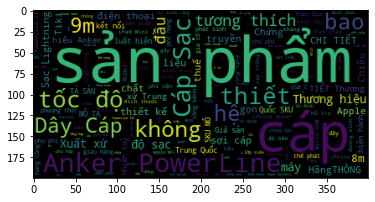

In [35]:
wc = WordCloud(stopwords=stop_words).generate(wordcloud_text)
plt.imshow(wc)

# Nhan xet:
+ Do su dung ten va phan mo ta de so sanh dac tinh cua san pham, do chinh xac cua he thong bi anh huong khi ten va phan mo ta ko chinh xac va thieu thong tin

In [38]:
#Neu ko clean Data ket qua se ra khac chu Cap se ko lon bang so voi khi clean ??

# Luu ket qua

In [36]:
info =[]
for p_id, v in results.items():
    for item in v:
        info.append({
            'product_id': p_id,
            'rcmd_product_id' : item[1],
            'score': item[0]
        })
content_based_df = pd.DataFrame(info)

In [37]:
content_based_df.to_csv("CB_new.csv")